## 2.2 A simple example

상태공간 모델의 일반적인 형태에 대해 소개하기 전에 단순한 예제를 먼저 생각해 보겠습니다. 랜덤 오차의 영향을 받는 측정치들 ($Y_t:t=1,2,\dots$)을 기반으로 물체의 위치 $\theta$를 결정하는 문제를 생각해 봅시다. 이 문제는 꽤 직관적이며 동역학적 영향을 포함할 수 있습니다. 정적인 문제의 경우 물체는 시간에 따라 이동하지 않지만 움직이는 물체에 대한 경우로 확장하기 위해 먼저 다루어야 합니다.

1장에서 정적 문제에 대한 베이지안 추론에 대해 이미 다루었습니다. 바다에서 작은 섬에 도착하여 위치 $\theta$를 알고자 하는 경우 였습니다. 관측은 다음과 같이 모델링 하였습니다.

$$Y_t=\theta+\epsilon_t,\;\;\;\;\epsilon_t\sim iid N(0,\sigma^2)$$

즉 $\theta$가 주어졌을 때 $Y_t$들은 $N(\theta,\sigma^2)$를 따르며 idd입니다. 1장에서 봤듯이 $\theta$의 사후분포 또한 가우시안이며 업데이트된 변수들은 (1.2), (1.3)과 같습니다.

사전 위치 $\theta$에 대해 $m_0=1$, $C_0=2$라고 해 봅시다. 사전 밀도는 그림2.5의 첫번째 그림에 나타나 있습니다. $m_0$또한 관측치에 대한 예측치로 볼 수 있습니다. $E(Y_1)=E(\theta+\epsilon_1)=E(\theta)=m_0=1$

$t=1$에서 $Y_1=1.3$을 관측했다고 합시다. 이에 따라 $\theta$의 사후 분포 변수는 다음과 같이 계산됩니다.

$$m_1=m_0+\frac{C_0}{C_0+\sigma^2}(Y_1-m_0)=1.24$$

$$C_1^{-1}=\sigma^2+C_0^{-1}=0.4^{-1}$$

예측 오차 $(Y_1-m_0)$와 가중치 $K_1=C_0/(C_0+\sigma^2)$를 통해 $m_1$를 얻었음을 볼 수 있습니다. 관측치가 정확할수록 또는 초기 정보가 부정확 할수록 데이터를 더 신뢰하게 됩니다. 이 위의 식에서 $C_0$대비 $\sigma^2$이 작을수록 데이터 수정 항 $K_1$가 커지는 것으로 표현됩니다. $t=2$에서 새로운 관측치 $Y_2=1.2$를 얻었을 때 $\theta|Y_{1:2}$의 밀도를 계산할 수 있고, 이 밀도는 $N(m_2,C_2)$, $m_2=1.222$, $C_2=0.222$입니다. 그림2.5의 두번째 그림은 $y_{1:2}$가 주어졌을 때 사후 밀도를 보여줍니다. 새로운 데이터를 취득할 때마다 순차적으로 이를 반복할 수 있습니다.

이제 이 문제에 동적인 성분을 포함해 봅시다. $t=2$에서 물체가 움직이기 시작했다고 합시다. 따라서 위치는 두개의 연속된 측정값 사이에서 변할 것 입니다. 단순한 운동을 다음과 같이 표현해 봅시다.

$$\theta_t=\theta_{t-1}+\nu+w_t,\;\;\;\;w_t\sim N(0,\sigma_w^2)\tag{2.1}$$

여기서 $\nu$는 이미 알고 있는 속도이며, $w_t$는 가우시안 랜덤 오차이고 평균이 0, 분산이 $\sigma_w^2$입니다. 예를들어 $\nu=4.5$, $\sigma_w^2=0.9$라고 해 봅시다. 그러면 연속된 시간 상에서 물체의 위치를 나타내는 과정 ($\theta_t:t=1,2,\dots$)를 정의할 수 있습니다. 관측식은 다음과 같이 쓸 수 있습니다. 

$$Y_t=\theta_t+\epsilon_t,\;\;\;\;\epsilon_t\sim iid N(0,\sigma^2)\tag{2.2}$$

그리고 $(\theta_t)$와 $(\epsilon_t)$는 독립이라고 가정하겠습니다. 위치 $\theta_t$에 대한 추론을 하기 위해 다음과 같은 과정을 수행하겠습니다.

*초기단계.* 이전의 결과에 따라 $t=2$에서 다음을 알고 있습니다.

$$\theta_2|y_{1:2}\sim N(m_2=1.222,C_2=0.222)$$

*예측단계.* (2.1)을 사용하면 $t=3$에서 위치가 어디로 변할 지 예측할 수 있습니다.

$$\theta_3|y_{1:2}\sim N(a_3,R_3)$$

with

$$a_3=E(\theta_2+\nu+w_3|y_{1:2})=m_2+\nu=5.722$$

그리고 분산은,

$$R_3=Var(\theta_2+\nu+w_3|y_{1:2})=C_2+\sigma_w^2=1.122$$

그림 2.5의 세번째 그림은 $\theta_2|y_{1:2}$의 조건부 분포에서 $\theta_3|y_{1:2}$의 예측 분포로 가는 예측단계를 보여줍니다. 

$t=2$에서의 위치에 대한 확신이 꽤 있다 하더라도 $t=3$에서의 위치는 불확실합니다. 이는 $\theta_t$의 동적 거동에서 랜덤 오차 $w_t$의 영향이며, $\sigma_w^2$이 커질수록 다음측정 시간에서의 위치에 대한 불확실성이 커집니다. 또한 $y_{1:2}$가 주어지면 다음 예측치 $Y_3$도 예측할 수 있습니다. 관측식 (2.2)에 따라 다음과 같이 계산 가능합니다.

$$Y_3|y_{1:2}\sim N(f_3,Q_3)$$

where

$$f_3=E(\theta_3+\epsilon_3|y_{1:2})=a_3=5.722$$

$$Q_3=Var(\theta_3+\epsilon_3|y_{1:2})=R_3+\sigma^2=1.622$$

$Y_3$에 대한 불확실 성은 $t=3$에서의 위치($R_3$)에 대한 불확실성 뿐만 아니라 측정오차 ($Q_3$에서 $\sigma^2$)에도 영향을 받습니다.

*추정 단계(필터링).* 이제 $t=3$에서 관측치 $Y_3=5$를 얻었습니다. $Y_3$에 대한 예측결과는 $f_3=a_3=5.722$였고 이에 따라 예측 오차는 $e_t=y_t-f_t=-0.722$가 됩니다. $\theta_3$과 $Y_3$에 대해 과대평가 했음을 알 수 있습니다. 따라서 $\theta_3$에 대한 새로운 추정치인 $E(\theta_3|y_{1:3})$는 $a_3=E(\theta|y_{1:2})$보다 작아질 것입니다. $\theta_3|y_{1:3}$에 대한 사후 밀도를 계산하기 위해 베이즈 법칙을 사용할 것이며, $y_{1:2}$이 주어졌을 때 $\theta_3$의 밀도 $N(a_3,R_3)$는 사전밀도 역할을 할 것입니다. 또한 $(\theta_3,y_1,y_2)$가 주어졌을 때 $Y_3$의 밀도는 가능도함수 역할을 하게 됩니다. (2.2)는 다음과 함께 $Y_3$은 $\theta_3$이 주어졌을 때 과거의 관측치와 독립임을 의미하고 있습니다.

$$Y_3|\theta_3 \sim N(\theta_3,\sigma^2)$$

따라서 베이즈 법칙 ((1.3) 참조)에 따라 다음을 얻게 됩니다.

$$\theta_3|y_1,y_2,y_3\sim N(m_3,C_3)$$

where

$$m_3=a_3+\frac{R_3}{R_3+\sigma^2}(y_3-f_3)=5.568$$

$$C_3=\frac{\sigma^2R_3}{\sigma^2+R_3}=R_3-\frac{R_3}{R_3+\sigma^2}R_3=0.346$$

추정-수정 과정으로 업데이트가 수행됨을 보았습니다. $y_{1:3}$이 주어졌을 때 $\theta_3$에 대한 최적의 추정치는 미리 계산한 최적의 추정치 $a_3$를 $K_3=R_3/(R_3+\sigma^2)$의 가중치를 갖는 오차 $e_3=y_3-f_3$로 수정하여 얻게됩니다. 이 가중치는 $\theta_3$에 대한 예측치 $a_3$에 대한 불확실 성이 클수록 커지며(즉, $R_3$이 클수록, 그리고 이는 $C_2$, $\sigma_w^2$에 영향을 받음) 그리고 관측 $Y_3$이 정확할수록(예를들어 $\sigma^2$이 작을수록) 커집니다. 이러한 결과를 통해 데이터를 추정 및 예측하는데 있어 신호잡음비(SNR)이라고 불리는 관측분산 $\sigma^2$에 대한 시스템의 분산 $\sigma_w^2$의 비율이 영향을 미침을 알 수 있습니다. 그림 2.5의 마지막 그림은 이 추정 단계를 보여줍니다. 새로운 관측치가 추가될 때마다 앞선 과정들을 반복하여 추정치를 업데이트할 수 있습니다.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Prior
m0=1; C0=2; sigma=np.sqrt(0.5);
x = np.linspace(-1,9,100)
prior = norm.pdf(x,loc=m0,scale=np.sqrt(C0));
# Post with Observation Y1=1.3
Y1 = 1.3;
m1 = m0 + (C0/(C0+sigma**2))*(Y1-m0);
C1 = 1/(1/sigma**2+1/C0);
post1 = norm.pdf(x, loc=m1, scale=np.sqrt(C1))
# Post with Observation Y2=1.2
Y2 = 1.2;
m2 = m1 + (C1/(C1+sigma**2))*(Y2-m1);
C2 = 1/(1/sigma**2+1/C1);
post2 = norm.pdf(x, loc=m2, scale=np.sqrt(C2))
# Prediction Step using Dynamics Eq (2.1), (2.2)
# \theta_t = \theta_{t-1} + \nu + w_t
# Y_t = \theta_t+\epsilon_t
nu = 4.5; sigma_w = np.sqrt(0.9);
a3 = m2+nu;
R3 = C2+sigma_w**2;
f3 = a3;
Q3 = R3 + sigma**3;
# Estimation Step (filtering) using Y3
Y3 = 5;
m3 = a3 + (R3/(R3+sigma**2))*(Y3-f3);
C3 = R3-(R3/(R3+sigma**2))*R3;

In [66]:
C3

0.34589041095890416

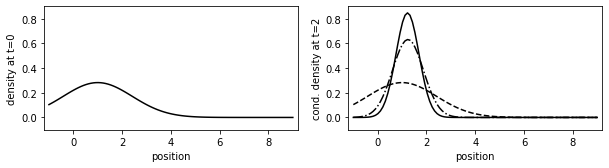

In [54]:
plt.figure(figsize=(10,5));
plt.subplot(221); 
plt.plot(x,prior,'k-'); plt.yticks(np.linspace(0,0.8,5)); plt.ylim(-0.1,0.9);
plt.xticks(np.linspace(0,8,5)); plt.xlim(-1.2,9.2);
plt.xlabel('position'); plt.ylabel('density at t=0');
plt.subplot(222); 
plt.plot(x,prior,'k--'); plt.plot(x,post1,'k-.'); plt.plot(x,post2,'k-');
plt.xlabel('position'); plt.ylabel('cond. density at t=2');
plt.yticks(np.linspace(0,0.8,5)); plt.ylim(-0.1,0.9);
plt.xticks(np.linspace(0,8,5)); plt.xlim(-1.2,9.2);